In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('BTC-USD.csv',parse_dates=['Date'],index_col='Date')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-19,888.335022,904.614014,884.338013,899.072998,899.072998,105625000.0
2017-01-20,898.171997,899.398010,887.007996,895.026001,895.026001,86728400.0
2017-01-21,895.549011,927.367004,895.534973,921.789001,921.789001,111158000.0
2017-01-22,922.205017,937.525024,897.564026,924.672974,924.672974,116573000.0
2017-01-23,925.499023,928.265991,916.737976,921.012024,921.012024,73588600.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2160 entries, 2017-01-19 to 2022-12-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2160 non-null   float64
 1   High       2160 non-null   float64
 2   Low        2160 non-null   float64
 3   Close      2160 non-null   float64
 4   Adj Close  2160 non-null   float64
 5   Volume     2160 non-null   float64
dtypes: float64(6)
memory usage: 118.1 KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03
mean,17757.105591,18208.180831,17251.965903,17762.366285,17762.366285,2.279848e+10
std,16797.729896,17227.944198,16295.010678,16789.633173,16789.633173,2.031332e+10
min,888.335022,899.398010,884.338013,892.687012,892.687012,6.085170e+07
25%,6460.732422,6554.507568,6356.317383,6468.067383,6468.067383,5.419507e+09
50%,9677.964844,9852.803223,9472.397461,9681.777343,9681.777343,2.021873e+10
75%,23950.560058,24606.960450,23599.697265,23950.114260,23950.114260,3.343051e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [6]:
df.shape

(2160, 6)

Text(0, 0.5, 'Close Price(USD)')

<Figure size 1008x576 with 0 Axes>

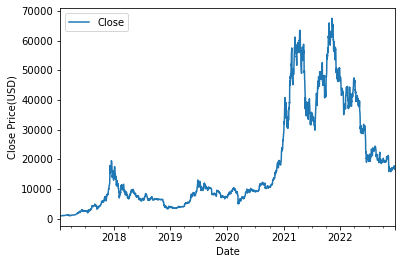

In [7]:
plt.figure(figsize=(14,8))
df.plot(y='Close')
plt.xlabel('Date')
plt.ylabel('Close Price(USD)')

In [8]:
# Get the number of rows to train and test the model by using math.ceil to round up
# Using 70% of data for training 
dataset = df['Close'].values.reshape(-1,1)
training_data = math.ceil(len(dataset)*.7)
training_data

1512

In [9]:
data = df.filter(['Close'])
data

,Close
Date,
2017-01-19,899.072998
2017-01-20,895.026001
2017-01-21,921.789001
2017-01-22,924.672974
2017-01-23,921.012024
...,...
2022-12-14,17815.650390
2022-12-15,17364.865230
2022-12-16,16647.484380


In [10]:
dataset

array([[  899.072998],
       [  895.026001],
       [  921.789001],
       ...,
       [16647.48438 ],
       [16795.0918  ],
       [16757.97656 ]])

## Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler


In [12]:
#Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[9.57790516e-05],
       [3.50809018e-05],
       [4.36480898e-04],
       ...,
       [2.36295468e-01],
       [2.38509331e-01],
       [2.37952665e-01]])

In [13]:
# Create training dataset
train_data = scaled_data[0:training_data,:]

prediction_days = 60

X_train = []
y_train = []

#Predict the price by looking the last 60 days of price
for i in range(prediction_days,len(train_data)):
    X_train.append(train_data[i - prediction_days:i, 0])
    y_train.append(train_data[i,0])
    
    if i <=60:
        print(X_train)
        print(y_train)
        print()

[array([9.57790516e-05, 3.50809018e-05, 4.36480898e-04, 4.79735644e-04,
       4.24827550e-04, 0.00000000e+00, 1.32809810e-04, 3.73442936e-04,
       4.05899312e-04, 4.33496623e-04, 4.02089319e-04, 4.15378534e-04,
       1.16560936e-03, 1.44487797e-03, 1.78649434e-03, 2.05811458e-03,
       2.25294259e-03, 2.01956788e-03, 2.18170057e-03, 2.52966084e-03,
       2.55545750e-03, 1.52526875e-03, 1.43964358e-03, 1.67625706e-03,
       1.59723119e-03, 1.46916054e-03, 1.67775654e-03, 1.72170149e-03,
       2.02106734e-03, 2.30258608e-03, 2.42572352e-03, 2.32748380e-03,
       2.80907958e-03, 3.33882122e-03, 3.37091600e-03, 4.11003358e-03,
       4.21442312e-03, 3.76687198e-03, 4.08723584e-03, 4.30876130e-03,
       4.30876130e-03, 4.94664022e-03, 5.37424243e-03, 5.73390180e-03,
       5.43633568e-03, 5.61586511e-03, 5.70150493e-03, 4.96223905e-03,
       3.85926213e-03, 4.43654726e-03, 3.36011766e-03, 4.24666804e-03,
       4.92984218e-03, 5.08792504e-03, 5.20911079e-03, 5.35324441e-03,
     

In [14]:
len(X_train)

1452

In [15]:
#Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train) ,np.array(y_train)

In [16]:
X_train.shape

(1452, 60)

In [17]:
# Reshape the train data to 3-dim for LSTM
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1452, 60, 1)

In [18]:
#Create testing dataset
#Create new array containing scaled values from index 1219
prediction_days =60
test_data = scaled_data[training_data - prediction_days:,:]

#Create the data set X_test and y_test
X_test = []
y_test = dataset[training_data :,:]

for i in range(prediction_days,len(test_data)):
    X_test.append(test_data[i - prediction_days : i,0])

In [19]:
X_test

[array([0.56189332, 0.52005123, 0.49539857, 0.54629384, 0.57435522,
        0.53892978, 0.52922247, 0.52342017, 0.53600071, 0.52759761,
        0.51976767, 0.44894485, 0.48164212, 0.46757191, 0.47089758,
        0.47205266, 0.47510417, 0.44304822, 0.48854639, 0.50129929,
        0.50059642, 0.4832709 , 0.48961244, 0.51920582, 0.54862953,
        0.5404401 , 0.55871168, 0.57553534, 0.5700974 , 0.67948049,
        0.68374962, 0.66030842, 0.70517061, 0.69910409, 0.69311472,
        0.71728861, 0.70570645, 0.72452653, 0.76875862, 0.76172125,
        0.82483921, 0.82800965, 0.84961362, 0.79962985, 0.71889548,
        0.73210759, 0.69293978, 0.6816297 , 0.67936032, 0.66360184,
        0.73099637, 0.71221467, 0.74459985, 0.71494706, 0.72043849,
        0.72021469, 0.75462546, 0.77022119, 0.80888076, 0.82664528]),
 array([0.52005123, 0.49539857, 0.54629384, 0.57435522, 0.53892978,
        0.52922247, 0.52342017, 0.53600071, 0.52759761, 0.51976767,
        0.44894485, 0.48164212, 0.46757191, 0.

In [20]:
# Convert the data to numpy array
X_test = np.array(X_test)

In [21]:
# Reshape the train data to 3-dim for LSTM
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [22]:
X_test.shape

(648, 60, 1)

## Creating Model LSTM

In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


In [24]:
model = Sequential()

model.add(LSTM(50, return_sequences=True,input_shape=(X_train.shape[1],1)))

model.add(LSTM(50, return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam',loss='mse')

In [25]:
#Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor ='loss',patience=2)
model.fit(x=X_train,
          y=y_train,
          epochs=10,
          batch_size=1,)

Epoch 1/10
1452/1452 [==============================] - 25s 15ms/step - loss: 0.0013
Epoch 2/10
1452/1452 [==============================] - 24s 16ms/step - loss: 6.9929e-04
Epoch 3/10
1452/1452 [==============================] - 23s 16ms/step - loss: 5.8027e-04
Epoch 4/10
1452/1452 [==============================] - 23s 16ms/step - loss: 3.4782e-04
Epoch 5/10
1452/1452 [==============================] - 23s 16ms/step - loss: 4.0618e-04
Epoch 6/10
1452/1452 [==============================] - 23s 16ms/step - loss: 3.1222e-04
Epoch 7/10
1452/1452 [==============================] - 24s 16ms/step - loss: 3.9664e-04
Epoch 8/10
1452/1452 [==============================] - 23s 16ms/step - loss: 2.2998e-04
Epoch 9/10
1452/1452 [==============================] - 23s 16ms/step - loss: 4.1203e-04
Epoch 10/10
1452/1452 [==============================] - 23s 16ms/step - loss: 1.7184e-04


In [26]:
#Save model
from tensorflow.keras.models import load_model

In [27]:
model.save('bitcoin.h5')

In [28]:
# Get the model predictions price values
predictions1 = model(X_test)
predictions1 = scaler.inverse_transform(predictions1)
len(predictions1)

648

In [29]:
# Root Mean Squar error for model
rmse = np.sqrt(np.mean(predictions1 - y_test)**2)
rmse

3662.0747421433084

Text(0, 0.5, 'loss')

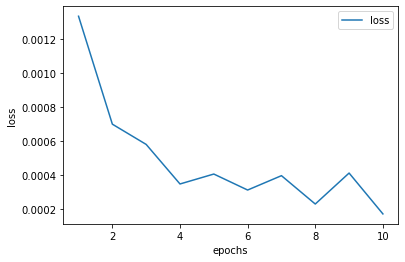

In [30]:
loss1 = pd.DataFrame(model.history.history)
loss1.index +=1
loss1.plot()
plt.xlabel('epochs')
plt.ylabel('loss')

Based on the graph, we can see that between epochs 6 and epochs 10 have the less loss. Hence we can train our model again with 6 epochs to see which one is better fitting.

In [31]:
#Train the model again with 6 epochs or higher
#Build model 2 to compare them together

#LSTM Model 2
tf.random.set_seed(42)

model_2 = Sequential()

model_2.add(LSTM(50, return_sequences=True,input_shape=(X_train.shape[1],1)))

model_2.add(LSTM(50, return_sequences=False))

model_2.add(Dense(25))

model_2.add(Dense(1))

#Compile the model2
model_2.compile(optimizer='adam',loss='mse')

#fit model_2
model_2.fit(x=X_train,
           y=y_train,
           epochs=7,
           batch_size=1,)

Epoch 1/7
1452/1452 [==============================] - 26s 15ms/step - loss: 0.0019
Epoch 2/7
1452/1452 [==============================] - 23s 16ms/step - loss: 5.4848e-04
Epoch 3/7
1452/1452 [==============================] - 23s 16ms/step - loss: 4.7866e-04
Epoch 4/7
1452/1452 [==============================] - 23s 16ms/step - loss: 5.2695e-04
Epoch 5/7
1452/1452 [==============================] - 23s 16ms/step - loss: 2.6554e-04
Epoch 6/7
1452/1452 [==============================] - 23s 16ms/step - loss: 2.9256e-04
Epoch 7/7
1452/1452 [==============================] - 23s 16ms/step - loss: 3.1259e-04


In [32]:
# Get the model_2 predicted price values
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2) 

21/21 [==============================] - 1s 12ms/step


648

In [33]:
# RMSE for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

7560.373329378375

C:\Users\ACER\AppData\Local\Temp/ipykernel_27076/1080078805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions1


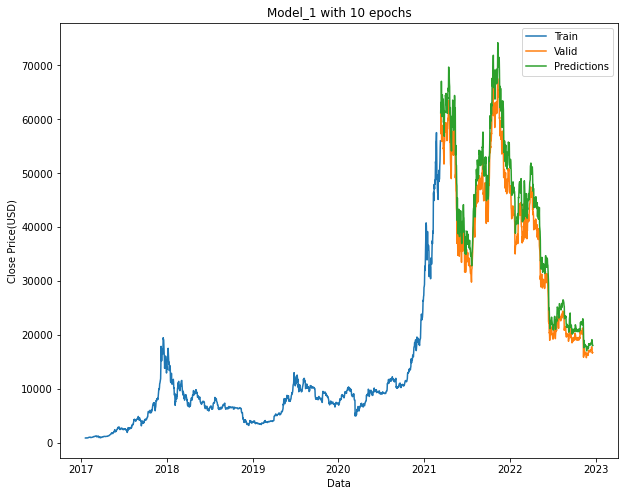

In [34]:
#plot the data
train = data[:training_data]

#data for model_1
valid_1 = data[training_data:]
valid_1['Predictions'] = predictions1

#visualized model_1
plt.figure(figsize=(10,8))
plt.plot(train)
plt.plot(valid_1[['Close','Predictions']])
plt.xlabel('Data')
plt.ylabel('Close Price(USD)')
plt.title('Model_1 with 10 epochs')
plt.legend(['Train','Valid','Predictions'])

C:\Users\ACER\AppData\Local\Temp/ipykernel_27076/2963894511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


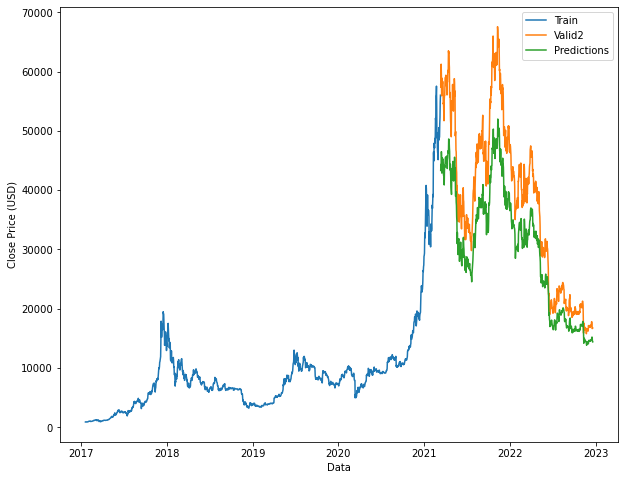

In [35]:
#data for model_2
train = data[:training_data]


valid_2 = data[training_data:]
valid_2['Predictions'] = predictions_2
plt.figure(figsize=(10,8))
plt.plot(train)
plt.plot(valid_2[['Close','Predictions']])
plt.xlabel('Data')
plt.ylabel('Close Price (USD)')
plt.legend(['Train','Valid2','Predictions'])


In [36]:
valid_2.tail()

,Close,Predictions
Date,,
2022-12-14,17815.65039,15108.937500
2022-12-15,17364.86523,15222.931641
2022-12-16,16647.48438,14941.984375
2022-12-17,16795.09180,14419.097656
2022-12-18,16757.97656,14398.740234


In [37]:
valid_1.tail()

,Close,Predictions
Date,,
2022-12-14,17815.65039,19048.201023
2022-12-15,17364.86523,19139.199702
2022-12-16,16647.48438,18718.065544
2022-12-17,16795.09180,18000.941274
2022-12-18,16757.97656,18075.789257


 Model 2 has a better predictions than the model 2.

# Lets Predict the today price of bitcoin

In [38]:
#Get the last 60 days closing price values and convert the dataframe to an array
last_60days = data[-60:].values

#Scale tje data to be values between 0 and 1
scaled_60days = scaler.fit_transform(last_60days)

#create new empty list
new_X_test = []
new_X_test.append(scaled_60days)

#Concert the new test data to numpy array
new_X_test = np.array(new_X_test)
#Reshape the data
new_X_test = np.reshape(new_X_test,(new_X_test.shape[0],new_X_test.shape[1],1))

#Get the predicted scaled price
pred_price = model_2.predict(new_X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 23ms/step
[[16657.564]]


In [39]:
new_X_test.shape

(1, 60, 1)

In [40]:
pred_price

array([[16657.564]], dtype=float32)